# 非平滑なPL条件下での最適化

参考：
* [Error bounds, PL condition, and quadratic growth for weakly convex functions, and linear convergences of proximal point methods](https://arxiv.org/abs/2312.16775)
    * introの文献は基本的に全部読んでおこう

[OPT_Grad_PL_convergence.ipynb](OPT_Grad_PL_convergence.ipynb)でやった内容は平滑な関数に対しての話でした．今回は非平滑な関数の話をします．

## 準備

* 点$x$から$S$への距離：$\operatorname{dist}(x, S):=\min _{y \in S}\|x-y\|$
* 点$x$から集合$S$への射影：$\operatorname{\Pi}_{S}(x):=\arg \min _{y \in S}\|x-y\|$
* 関数$f$の$\nu$-sublevel set: $[f \leq \nu]:=\left\{x \in \mathbb{R}^n \mid f(x) \leq \nu\right\}$

---

**劣微分**

$f: \mathbb{R}^n \to \overline{\mathbb{R}}$をプロパーな閉関数とします．この$f$について，次のフレシェ劣微分を定義しましょう：

$$
\hat{\partial} f(x):=\left\{s \in \mathbb{R}^n \left\lvert\, \liminf _{y \rightarrow x} \frac{f(y)-f(x)-\langle s, y-x\rangle}{\|y-x\|} \geq 0\right.\right\}
$$

$f$が凸ならば，フレシェ劣微分$\hat{\partial} f(x)$は普通の凸についての劣微分と同じです：

$$
\hat{\partial} f(x)=\partial f(x):=\left\{s \in \mathbb{R}^n \mid f(y) \geq f(x)+\langle s, y-x\rangle, \forall y \in \mathbb{R}^n\right\}, \quad \forall x \in \mathbb{R}^n
$$

さらに，平滑ならば，$\hat{\partial} f(x)$は微分と同じです．

---

**Slope**

Closedな関数$f: \mathbb{R}^n \to \overline{\mathbb{R}}$と，$f(\bar{x})$が有限な点$\bar{x}$を考えましょう．
$\bar{x}$でのslopeは次のように定義されます：

$$
|\nabla f|(\bar{x}):=\limsup _{x \rightarrow \bar{x}} \frac{(f(\bar{x})-f(x))^{+}}{\|x-\bar{x}\|}
$$

ここで，$(a)^{+}:=\max(a, 0)$です．

* 直感的には，点$x$での関数$f$の傾きを表現します．普通の微分では勾配のノルムを取ればいいですが，非平滑な関数では勾配のノルムが定義されないので，slopeを使うことで一般化できます．
* $f$が平滑な関数ならば，Slopeは$\|\nabla f(\bar{x})\|$と同じです．
* $f(x)$が凸関数ならば，劣微分の中身の最も小さいノルムと同じです：$|\nabla f|(\bar{x})=\operatorname{dist}(0, \partial f(\bar{x}))$
* Frechet劣微分可能であれば，$|\nabla f|(\bar{x})=\operatorname{dist}(0, \hat{\partial} f(\bar{x}))$と同じです．

上の内容は論文内で証明されてます．

---

**最適解の集合との距離**

次が成立します：

$f: \mathbb{R}^n \to \overline{\mathbb{R}}$をプロパーな閉関数とします．
点$x \in \operatorname{dom}(f)$について,次を満たすような定数$\alpha<f(x)$ と $r>0, K>0$ が存在するとします：
* $\alpha$までそんなに遠くない：$f(x)-\alpha<K r$ 
* 一定以上のスロープ：$|\nabla f|(u) \geq r$ が次を満たす任意の$u$で成立する：$u \in[\alpha<f(u) \leq f(x)],\|u-x\| \leq K$.

![](figs/dist-to-solutionset.jpg)

**ポイント**

* 画像みたいに，「局所的に凸みたいな感じになってれば，最適解との距離がバウンドできる」みたいなイメージかな？画像は凸で書いたけど，非平滑や凸以外でも多分成立すると思う．
* $\alpha=f^{\star}=\inf _{x \in \mathbb{R}^n} f(x)$ならば，解との集合の距離$\operatorname{dist}\left(x,\left[f=f^{\star}\right]\right)$を$\left(f(x)-f^{\star}\right) / r$でバウンドできます．

---

**Ekelandの変分原理**

$f: \mathbb{R}^n \to \overline{\mathbb{R}}$をプロパーな閉関数とします．
$\epsilon > 0$および$z \in\left[f(z) \leq \inf _{x \in \mathbb{R}^n} f(x)+\epsilon\right]$を考えましょう．つまり，$z$は最適解の$\epsilon$-sublevel setに含まれています．

このとき，任意の$\rho > 0$について，次を満たす$y \in \mathbb{R}^n$が存在します：

* $z$と$y$の距離がバウンドされてる：$\|z-y\| \leq \epsilon / \rho$
* $y$は$z$よりもましな解：$f(y) \leq f(z)$
* $y$は関数$f + \rho\|\cdot - z\|$の最適解：$f(y) < f(x)+\rho\|x-z\|, \quad \forall x \in \mathbb{R}^n /\{y\}$

この原理を使うと，$y$のslopeがバウンドされます：

$$
|\nabla f|(y)=\limsup _{x \rightarrow y} \frac{(f(y)-f(x))^{+}}{\|x-y\|} \leq \limsup _{x \rightarrow y} \frac{\rho \cdot \operatorname{dist}(x, y)}{\|x-y\|}=\rho
$$

**直感**：
ProperなClosed関数を考えると，その空間上では必ずしも最小値の存在が保証されていません．Ekelandの変分原理は，その関数を$\varepsilon$だけ変形すると，大域的な最小値が存在する関数にできることを主張してます．

## 他の条件との関係

弱凸関数において，PL条件などの正則性条件についてみていきましょう．
（ここで，正則性条件とは，理論的な展開や証明を用意にするために用いられる何らかの仮定や条件のことを指します．）

* $f: \mathbb{R}^n \to \overline{\mathbb{R}}$をプロパーな$\rho$-弱凸の閉関数とします．
* $S$を最適解の集合とします．つまり，$S=\left[f=f^{\star}\right]$です．空ではないとします．
* $\nu > 0$とします．

このとき，次の正則性条件について見てみましょう．
すべての正則性条件は，sublevel set $[f \leq f^{\star}+\nu]$上で定義されていることに注意しましょう．もし$v=+\infty$ならば，正則性条件はすべての領域で成立する条件になります．



---

**局所強凸性**

次を満たす正の定数$\mu_{\mathrm{s}} > 0$が存在する：

$$
\begin{aligned}
f(x)+\langle g, y-x\rangle+\frac{\mu_{\mathrm{s}}}{2}\|y-x\|^2 & \leq f(y) \\
& \forall x, y \in\left[f \leq f^{\star}+\nu\right], g \in \hat{\partial} f(x) .
\end{aligned}
$$

つまり，最適値$f^\star$の$\nu$-sublevel set上で，関数$f$は強凸になっています．

---

**Restricted Secant Inequality**

次を満たす定数$\mu_{\mathrm{r}} > 0$が存在する：

$$
\begin{aligned}
\mu_{\mathrm{r}} \cdot \operatorname{dist}^2(x, S) & \leq\langle g, x-\hat{x}\rangle, \\
& \forall x \in\left[f \leq f^{\star}+\nu\right], g \in \hat{\partial} f(x), \hat{x} \in \Pi_S(x) .
\end{aligned}
$$

これも結局，勾配が0ならば$x$が最適解であることを保証します．
$x$と最適解の距離をバウンドしてる意味で，ちょっと強い仮定です．

---


**Error Bound**

次を満たす定数$\mu_{\mathrm{e}} > 0$が存在する：

$$
\operatorname{dist}(x, S) \leq \mu_{\mathrm{e}} \cdot \operatorname{dist}(0, \hat{\partial} f(x)), \quad \forall x \in\left[f \leq f^{\star}+\nu\right]
$$

劣微分の中に$0$が入ってる場合，$x$は最適解になります．
$x$と最適解の距離をバウンドしてる意味で，次のPL条件よりもちょっと強い仮定です．

---

**PL条件**

次を満たす定数$\mu_{\mathrm{p}} > 0$が存在する：

$$
2 \mu_{\mathrm{p}} \cdot\left(f(x)-f^{\star}\right) \leq \operatorname{dist}^2(0, \hat{\partial} f(x)), \quad \forall x \in\left[f \leq f^{\star}+\nu\right] .
$$

劣微分の中に$0$が入ってる場合，$x$は最適解になります．

---

**Quadratic Growth**

次を満たす定数$\mu_{\mathrm{q}} > 0$が存在する：

$$
\frac{\mu_{\mathrm{q}}}{2} \cdot \operatorname{dist}^2(x, S) \leq f(x)-f^{\star}, \quad \forall x \in\left[f \leq f^{\star}+\nu\right]
$$

最適解から離れると，二次の速度で関数が増加することを言ってます．
これ単体では停留点の最適性は保証されません．

---

この正則性条件について，次の関係が成立します：

$$
(\mathrm{SC}) \rightarrow(\mathrm{RSI}) \rightarrow(\mathrm{EB}) \equiv(\mathrm{PL}) \rightarrow(\mathrm{QG})
$$

もし$\rho$-弱凸の$\rho$について，$\mu_{\mathrm{q}} > \rho$（これは$f$が凸かつQGのときに成り立ちます）ならば，さらに次が成立します：
$$
(\mathrm{RSI}) \equiv(\mathrm{EB}) \equiv(\mathrm{PL}) \equiv(\mathrm{QG})
$$

## 関数の例

QGを満たすが凸ではない例を見てみましょう

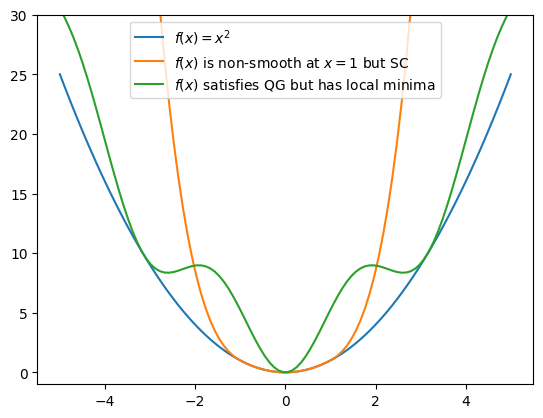

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 100)
f_1 = x ** 2
f_2 = np.where(np.abs(x) <= 1, x ** 2, x ** 4 / 2 + 0.5)
f_3 = x ** 2 + 6 * np.sin(x) ** 2

plt.plot(x, f_1, label=r'$f(x) = x^2$')
plt.plot(x, f_2, label=r'$f(x)$ is non-smooth at $x=1$ but SC')
plt.plot(x, f_3, label=r'$f(x)$ satisfies QG but has local minima')
plt.ylim(-1, 30)
plt.legend()

## Proximal Point Methodでの収束の証明

Proximal point methodを使うと，PL条件下で線形収束を保証できます．

$f: \mathbb{R}^n \to \overline{\mathbb{R}}$をプロパーな凸の閉関数とします．
この$f$について，

$$
f^{\star}=\min _x f(x)
$$

なる最適化問題を考えましょう．
ここで，$\bar{f}(x)=f(x)$ if $x \in X$，それ以外ならば$\bar{f}(x)=+\infty$とすれば，制約付き最適化問題も表現できることに注意しましょう．
$S = \arg\min_x f(x)$とします．
これについて，次をproximal mappingと呼びます：

$$
\operatorname{prox}_{\alpha f}\left(x_k\right):=\underset{x \in \mathbb{R}^n}{\operatorname{argmin}} f(x)+\frac{1}{2 \alpha}\left\|x-x_k\right\|^2,
$$

ここで，$\alpha > 0$です．初期点$x_0$を適当に選び，proximal mappingは次の更新式で$x_{k+1}$を求めます：
$$
x_{k+1}=\operatorname{prox}_{c_k f}\left(x_k\right), \quad k=0,1,2, \ldots
$$
ここで，$\{c_k\}_{k \geq 0}$ は正の数列です．

### 収束の解析

このProximal point methodについて，一般には次の$1/k$のオーダーの収束が知られています：

$f: \mathbb{R}^n \to \overline{\mathbb{R}}$をproperな凸の閉関数とします．最適解の集合$S$が空でないとき，次が成立します：

$$
f\left(x_k\right)-f^{\star} \leq \operatorname{dist}^2\left(x_0, S\right) /\left(2 \sum_{t=0}^{k-1} c_t\right) .
$$

さらに，$\lim _{k \rightarrow \infty} \sum_{t=0}^{k-1} c_t=\infty$ならば，最適解に収束します．

**証明** $2 c_k\left(f\left(x_{k+1}\right)-f\left(x^{\star}\right)\right) \leq\left\|x_k-x^{\star}\right\|^2-\left\|x_{k+1}-x^{\star}\right\|^2, \quad \forall c_k>0, x^{\star} \in S$についてtelescopingを取れば終わりです．

---

**凸＆PL条件**

凸性だけの場合は上の劣線形なオーダーになりますが，さらにPL条件などがあれば線形な収束を示すことができます．

$f: \mathbb{R}^n \to \overline{\mathbb{R}}$をプロパーな凸の閉関数とし，解の集合$S$が空でないとします．
さらに，$f$が$\left[f \leq f^{\star}+\nu\right]$についてPL条件を満たすとします（$\nu > 0$です）．

このとき，任意の
$$
k \geq k_0=\frac{\operatorname{dist}^2\left(x_0, S\right)}{2 \nu \inf _{k \geq 0} c_k}
$$
ステップで，次の線形収束が成立します：
$$
\begin{aligned}
& f\left(x_{k+1}\right)-f^{\star} \leq \omega_k \cdot\left(f\left(x_k\right)-f^{\star}\right) \\
& \operatorname{dist}\left(x_{k+1}, S\right) \leq \theta_k \cdot \operatorname{dist}\left(x_k, S\right)
\end{aligned}
$$

ここで，収束レートの係数は
$$
\omega_k=\frac{1}{1+c_k \mu_{\mathrm{p}}}<1, \quad \theta_k=\min \left\{\frac{1}{\sqrt{c_k \mu_{\mathrm{q}}+1}}, \frac{1}{\sqrt{c_k^2 / \mu_{\mathrm{e}}^2+1}}\right\}<1
$$
です．

**証明**

* 上でやった劣線形収束レートを使うと，$\left[f \leq f^{\star}+\nu\right]$に$x_k$は最悪でも$k_0$イテレーション以内に到達します．
* $\left[f \leq f^{\star}+\nu\right]$に$x_k$が到達したとき，$f$は凸かつQGなので，EB, PL, RSI，そしてQGは同値です．
* このとき，更新則$f\left(x_{k+1}\right) \leq f\left(x_{k+1}\right)+\frac{1}{2 c_k}\left\|x_{k+1}-x_k\right\|^2 \leq f\left(x_k\right)$より，$x_{k+1} \in\left[f \leq f^{\star}+\nu\right]$も成り立ちます．つまり，$k_0$イテレーション以降はPL条件を仮定して問題ありません．

まず，PL条件によって最初の主張が成立することを示します．
$x_{k+1}$の更新則から，
$$
-\left(x_{k+1}-x_k\right) / c_k \in \partial f\left(x_{k+1}\right)
$$
が言えます．よって，
$$
\begin{aligned}
f\left(x_k\right)-f\left(x_{k+1}\right) & \stackrel{(a)}{\geq}\left\|x_{k+1}-x_k\right\|^2 /\left(2 c_k\right) \\
& \stackrel{(b)}{\geq} \frac{c_k}{2} \operatorname{dist}^2\left(0, \partial f\left(x_{k+1}\right)\right) \stackrel{(c)}{\geq} c_k \mu_{\mathrm{p}}\left(f\left(x_{k+1}\right)-f^{\star}\right)
\end{aligned}
$$

(a)はProximalの更新から成立，(b)は$\operatorname{dist}$の定義から成立，(c)はPL条件です．
これで１個めの主張が示されました．

２個めは省略（論文参照）．

---



**弱凸＆PL条件**

上の証明のポイントは，凸関数上での最適化が，しばらくするとPL条件を満たす領域に到達することを利用しています．

